# **Mobile Price Classification Dataset**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

1. battery_power : Total energy a battery can store in one time measure in mAh
2. blue : Has bluetooth or not (0, 1)
3. clock_speed : speed at which microprocessor executes instructions
4. dual_sim : Has dual sim support or not (0,1)
5. fc : Front Camera mega pixels
6. four_g : Has 4G or not
7. int_memory : Internal Memory in Gigabytes
8. m_dep : Mobile Depth in cm
9. mobile_wt : Weight of mobile phone
10. n_cores : Number of cores of processor
11. pc : Primary Camera mega pixels
12. px_height : Pixel Resolution Height
13. px_width : Pixel Resolution Width
14. ram : Random Access Memory in Mega Bytes
15. sc_h : Screen Height of mobile in cm
16. sc_w : Screen Width of mobile in cm
17. talk_time : longest time that a single battery charge will last when you are
18. three_g : Has 3G or not
19. touch_screen : Has touch screen or not
20. wifi : Has wifi or not
21. price_range : This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

# **Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Desktop/train.csv')
df2 = pd.read_csv('../Desktop/test.csv')

In [3]:
df.head() # Explore dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.isna().sum() #Check missing value ; There are not missing value in this dataset

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.info() # This data has 2000 records, 20 features with price_range as label.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

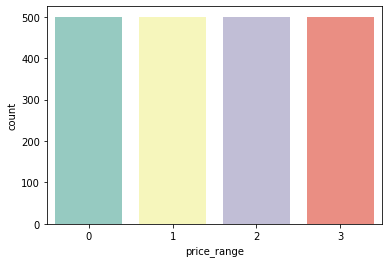

In [8]:
sns.countplot(x=df['price_range'], palette='Set3') #label is normal distributed
plt.show()

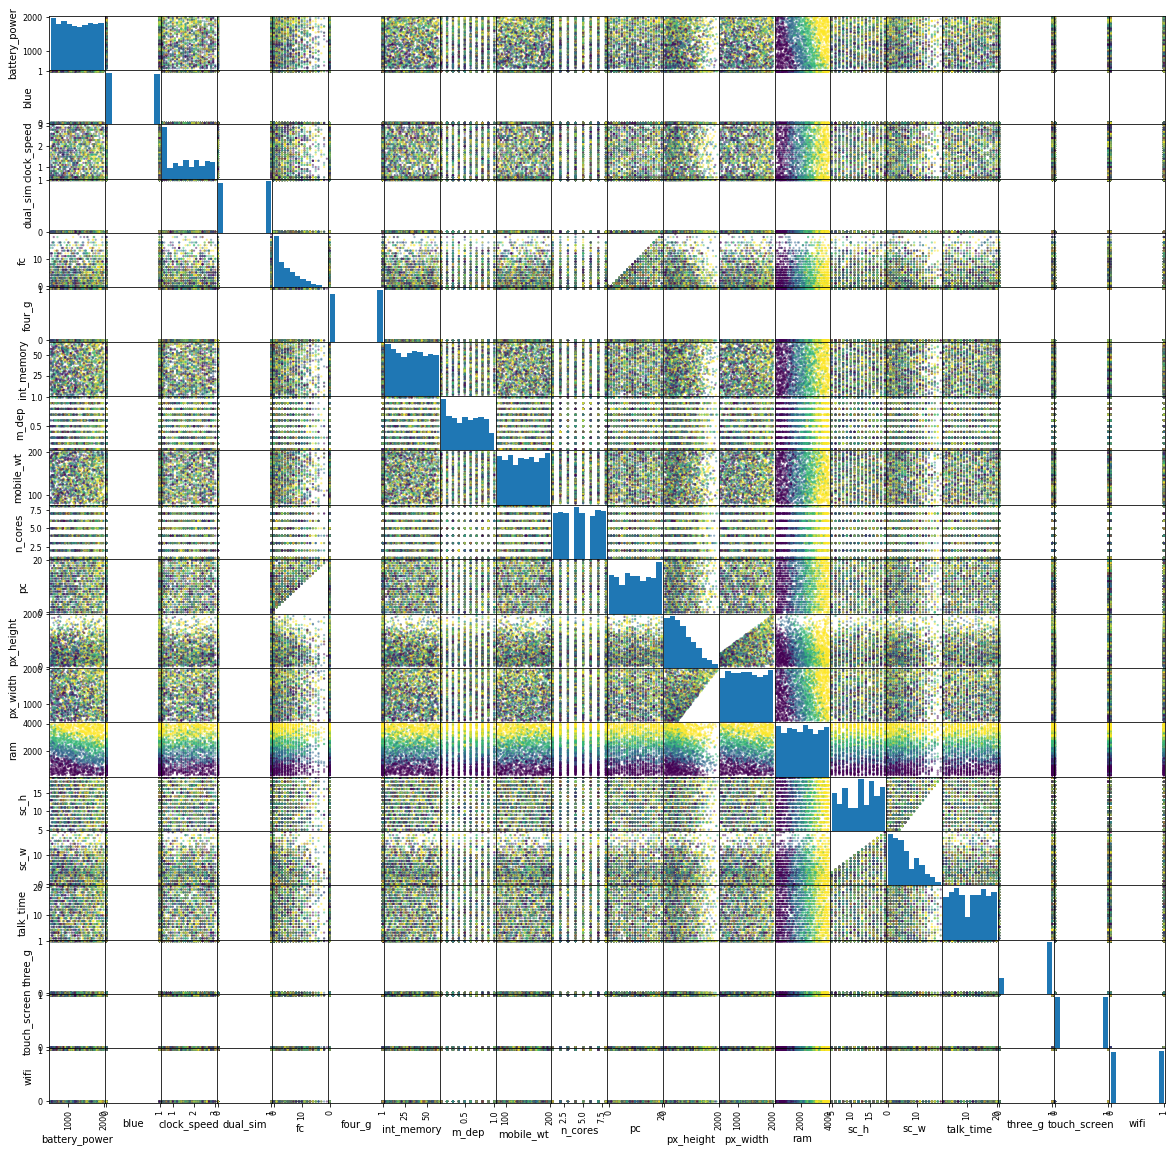

In [12]:
color = df['price_range']
feature = df.drop(columns='price_range', axis=1)

pd.plotting.scatter_matrix(feature,alpha=0.5,figsize=(20, 20),grid=True,diagonal='hist',marker='o',c=color,s=5)
plt.show()

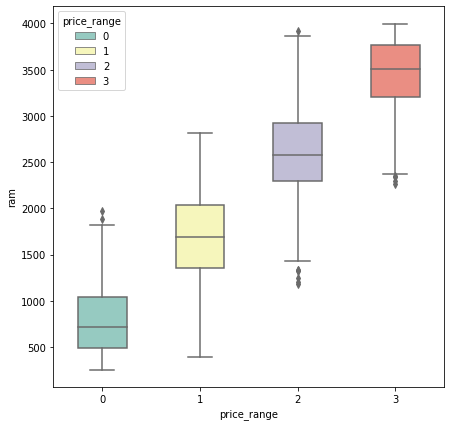

In [13]:
#ram vs price

plt.figure(figsize= (7, 7))
sns.boxplot(x=df['price_range'],y=df['ram'], hue=df['price_range'],palette='Set3',width=0.5,linewidth=1.5,dodge=False)
plt.show()

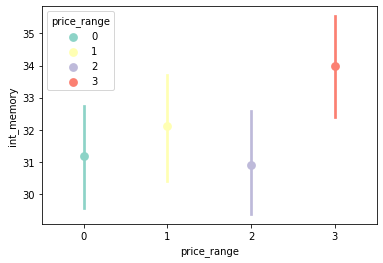

In [14]:
#internal memory vs price

sns.pointplot(x=df['price_range'], y=df['int_memory'], hue=df['price_range'], palette='Set3')
plt.show()

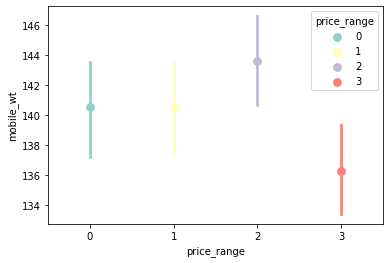

In [15]:
# weight vs price

sns.pointplot(x='price_range', y='mobile_wt', data=df, hue='price_range', palette='Set3')
plt.show()

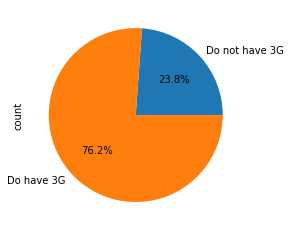

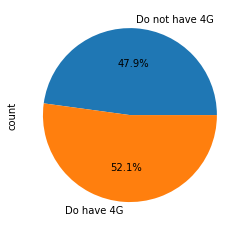

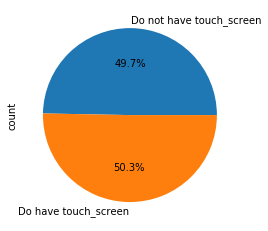

In [16]:
# No phone (3G, 4G, touch_screen)

threeG = df.groupby(['three_g'])[['three_g']].agg('count')
threeG.rename(index={0: 'Do not have 3G', 1:'Do have 3G'}, columns={'three_g': 'count'}, inplace=True)
fourG = df.groupby(['four_g'])[['four_g']].agg('count')
fourG.rename(index={0: 'Do not have 4G', 1:'Do have 4G'}, columns={'four_g': 'count'}, inplace=True)
touch = df.groupby(['touch_screen'])[['touch_screen']].agg('count')
touch.rename(index={0: 'Do not have touch_screen', 1:'Do have touch_screen'}, columns={'touch_screen': 'count'}, inplace=True)

threeG.plot(kind='pie', y='count', autopct='%.1f%%', legend=False)
fourG.plot(kind='pie', y='count', autopct='%.1f%%', legend=False)
touch.plot(kind='pie', y='count', autopct='%.1f%%', legend=False)

# **Use KNN Method**

In [69]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1992)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [70]:
print('Accuracy of Training set by KNN (n=5) : %.3f' %knn.score(X_train, y_train))
print('Accuracy of Testing set by KNN (n=5) : %.3f' %knn.score(X_test, y_test))

Accuracy of Training set by KNN (n=5) : 0.954
Accuracy of Testing set by KNN (n=5) : 0.937


## Optimized neighbors

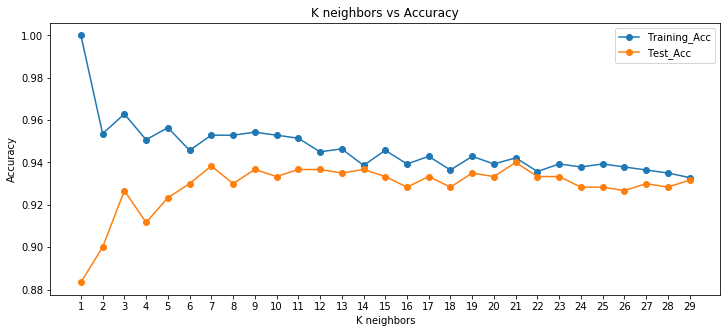

Best Test Accuracy is 0.94 when K neighbor is 21


In [71]:
train_acc = []
test_acc = []

for i in np.arange(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.figure(figsize=(12, 5))
plt.plot(np.arange(1, 30), train_acc, label='Training_Acc', marker='o')
plt.plot(np.arange(1,30), test_acc, label='Test_Acc', marker='o')
plt.title(label='K neighbors vs Accuracy')
plt.legend()
plt.xticks(np.arange(1, 30))
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.show()

print('Best Test Accuracy is {} when K neighbor is {}'.format(np.max(test_acc),1+test_acc.index(np.max(test_acc))))

# **Decision Tree Method**

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1992)

dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1992, splitter='best')

In [21]:
dt.score(X_test, y_test)

0.84

# **Random Forest Method**

In [22]:
from sklearn.ensemble import RandomForestClassifier

rndfrt = RandomForestClassifier(random_state=1992)

rndfrt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1992,
                       verbose=0, warm_start=False)

In [23]:
rndfrt.score(X_test, y_test)

0.8783333333333333

# **Conclusion KNN is the best method**

## Result using KNN method

In [72]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train, y_train)

print('%.4f' %knn.score(X_train, y_train))
print('%.4f' %knn.score(X_test, y_test))

0.9421
0.9400


In [73]:
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       162
           1       0.92      0.94      0.93       154
           2       0.89      0.92      0.91       140
           3       0.98      0.92      0.95       144

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [74]:
print('  Confusion Matrix\n', confusion.confusion_matrix, '\n')

  Confusion Matrix
 [[158   4   0   0]
 [  5 144   5   0]
 [  0   8 129   3]
 [  0   0  11 133]] 



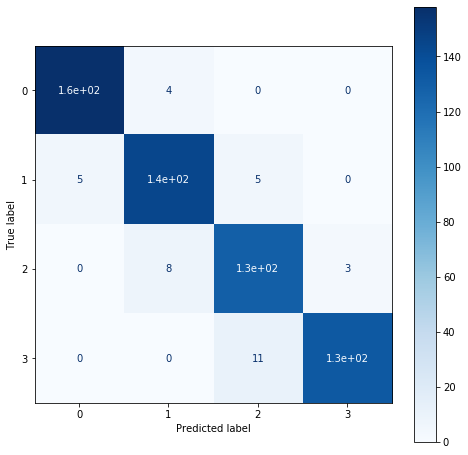

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

confusion = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, ax=ax)

plt.show()

# **Use KNN model in test.csv**

In [46]:
df2.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [47]:
df2.drop(columns='id', axis=1, inplace=True)

In [49]:
y_pred = knn.predict(df2)

In [50]:
df2['predicted_price_range'] = y_pred
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


## The result of KNN for test.csv with 1000 record :

In [63]:
df2['predicted_price_range'].value_counts()

2    260
0    260
3    258
1    222
Name: predicted_price_range, dtype: int64

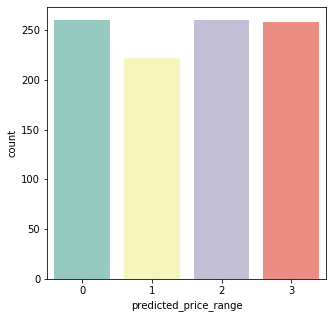

In [61]:
plt.figure(figsize=(5, 5))
sns.countplot(x='predicted_price_range', data=df2, palette='Set3')
plt.show()